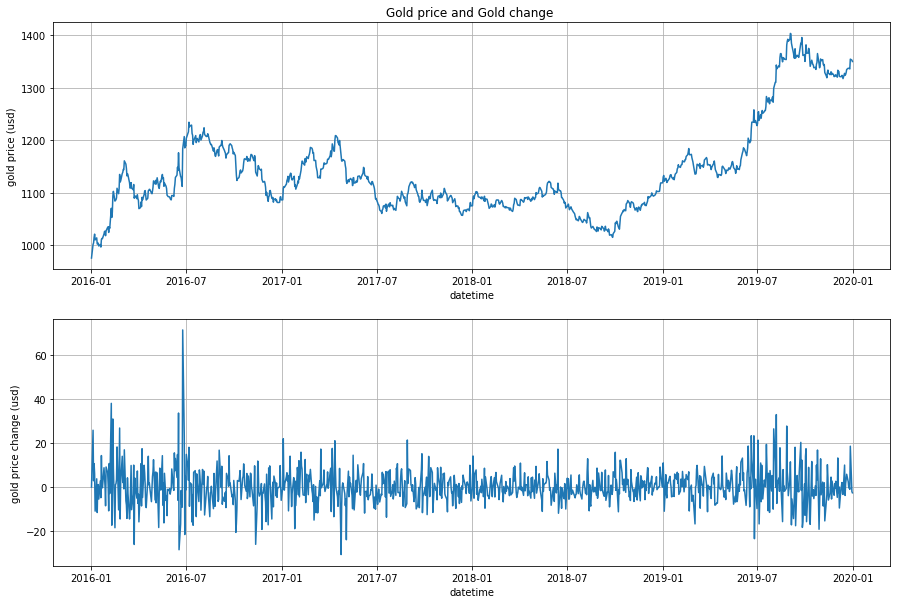

In [305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm

base_dir = "https://github.com/natsunoyuki/Data_Science/blob/master/gold/gold/gold_price_usd.csv?raw=True"

data = pd.read_csv(base_dir)


# Convert the datetime from str to datetime object.
data["datetime"] = pd.to_datetime(data["datetime"])

# Determine the daily change in gold price.
data["gold_price_change"] = data["gold_price_usd"].diff()
data["gold_price_change"]

# Restrict the data to later than 2008 Jan 01.
data_test = data[data["datetime"] >= pd.to_datetime("2020-01-01")]

data = data[(data["datetime"] >= pd.to_datetime("2016-01-01")) & (data["datetime"] < pd.to_datetime("2020-01-01"))]

# # Plot the daily gold prices as well as the daily change.
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
plt.title("Gold price and Gold change ")
plt.plot(data["datetime"], data["gold_price_usd"])
plt.xlabel("datetime")
plt.ylabel("gold price (usd)")
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(data["datetime"], data["gold_price_change"])
plt.xlabel("datetime")
plt.ylabel("gold price change (usd)")
plt.grid(True)
plt.show()

In [306]:
X = data[["gold_price_change"]].values
model = hmm.GaussianHMM(n_components = 5, covariance_type = "tied", n_iter = 300, random_state = 42)
model.fit(X)
Z = model.predict(X)
states = pd.unique(Z)

In [307]:
print("Unique states:")
print(states)


Unique states:
[0 3 4 1 2]


In [308]:
print("\nStart probabilities:")
print(model.startprob_)


Start probabilities:
[1.00000000e+00 9.86240274e-11 5.57591102e-60 7.52326359e-97
 3.30487200e-38]


# Plot data of 3 states during 2010-2019

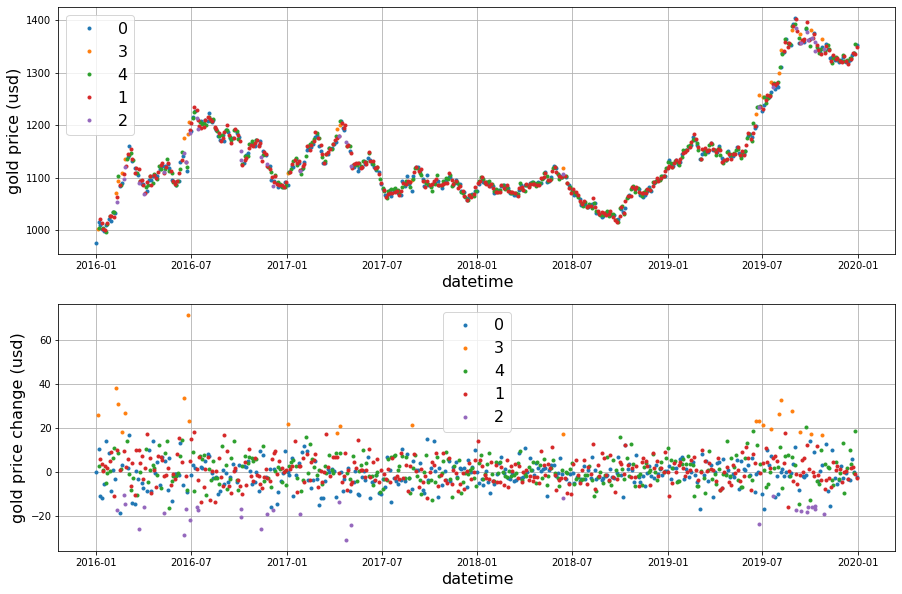

In [309]:
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
for i in states:
    want = (Z == i)
    x = data["datetime"].iloc[want]
    y = data["gold_price_usd"].iloc[want]
    plt.plot(x, y, '.')
plt.legend(states, fontsize=16)
plt.grid(True)
plt.xlabel("datetime", fontsize=16)
plt.ylabel("gold price (usd)", fontsize=16)
plt.subplot(2,1,2)
for i in states:
    want = (Z == i)
    x = data["datetime"].iloc[want]
    y = data["gold_price_change"].iloc[want]
    plt.plot(x, y, '.')
plt.legend(states, fontsize=16)
plt.grid(True)
plt.xlabel("datetime", fontsize=16)
plt.ylabel("gold price change (usd)", fontsize=16)
plt.show()

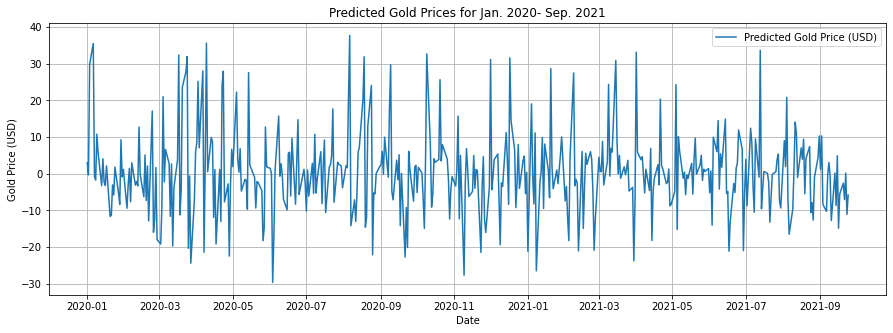

In [310]:
#2020-2021
import numpy as np
np.random.seed(42)
# Predict the hidden states for the future
future_hidden_states = model.predict(data_test["gold_price_change"].values.reshape(-1, 1))
# Calculate the predicted gold prices based on the predicted hidden states
predicted_prices = []

# Iterate over each predicted hidden state and generate corresponding gold price predictions
for state in future_hidden_states:
    price = np.random.normal(model.means_[state], np.sqrt(model.covars_[state]))
    predicted_prices.append(price)
pd_price = np.reshape(predicted_prices,-1)
# Plotting the predicted gold prices
plt.figure(figsize=(15, 5))
plt.plot(data_test['datetime'].values, pd_price, label="Predicted Gold Price (USD)")
plt.xlabel("Date")
plt.ylabel("Gold Price (USD)")
plt.title("Predicted Gold Prices for Jan. 2020- Sep. 2021")
plt.legend()
plt.grid(True)
plt.show()

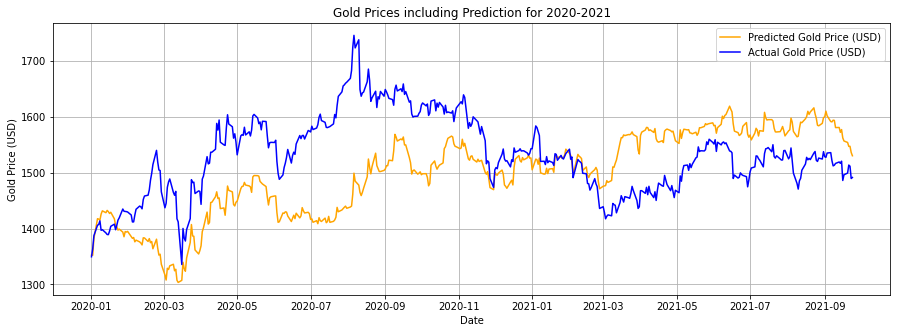

In [311]:
predicted_data = pd.DataFrame({
    "datetime": data_test['datetime'].values,
    "gold_price_change": pd_price
})
accuracy = []
predicted_gold_prices = []
initial_gold_price = data["gold_price_usd"].iloc[-1]

for change in predicted_data["gold_price_change"]:
    predicted_gold_price = initial_gold_price + change
    predicted_gold_prices.append(predicted_gold_price)
    initial_gold_price = predicted_gold_price 

predicted_data["predicted_gold_price_usd"] = predicted_gold_prices
plt.figure(figsize=(15, 5))
plt.plot(predicted_data["datetime"], predicted_data["predicted_gold_price_usd"], label="Predicted Gold Price (USD)", color='orange')
plt.plot(data_test["datetime"], data_test["gold_price_usd"], label="Actual Gold Price (USD)", color='blue')
plt.xlabel("Date")
plt.ylabel("Gold Price (USD)")
plt.title("Gold Prices including Prediction for 2020-2021")
plt.legend()
plt.grid(True)
plt.show()


In [312]:
len(data_test["gold_price_usd"].values)

453

In [313]:
len(predicted_data["predicted_gold_price_usd"].values)

453

In [323]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(data_test["gold_price_usd"].values, predicted_data["predicted_gold_price_usd"].values)
mae
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(data_test["gold_price_usd"], predicted_data["predicted_gold_price_usd"])
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Mean Absolute Error (MAE):", round(mae, 2))
# 
# print("Mean Squared Error (MSE):", mse)
print(f"Root Mean Squared Error (RMSE): ", round(rmse, 2) )

Mean Absolute Error (MAE): 81.07
Root Mean Squared Error (RMSE):  95.53


# Log the value of gold_price

In [328]:
predicted_data[predicted_data["datetime"] ==  pd.to_datetime("2020-01-15")]

,datetime,gold_price_change,predicted_gold_price_usd
10,2020-01-15,-2.25296,1430.126196


In [327]:
data_test[data_test["datetime"] ==  pd.to_datetime("2020-01-15")]

,datetime,gold_price_usd,gold_price_change
10708,2020-01-15,1389.05,-0.24
